In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
titanic_train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

titanic_test_df = pd.read_csv('/kaggle/input/titanic/test.csv')


titanic_train_df.set_index('PassengerId', inplace=True)
titanic_train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
pass_by_sex = titanic_train_df['Sex'].value_counts()

male_pc = (pass_by_sex['male']/pass_by_sex.sum())*100
female_pc = (pass_by_sex['female']/pass_by_sex.sum())*100

print("{}% of passengers are male while {}% are female".format(round(male_pc), round(female_pc)))

65% of passengers are male while 35% are female


<AxesSubplot:xlabel='Survived', ylabel='count'>

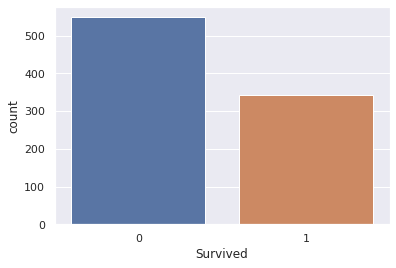

In [6]:
sns.countplot(data=titanic_train_df, x='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

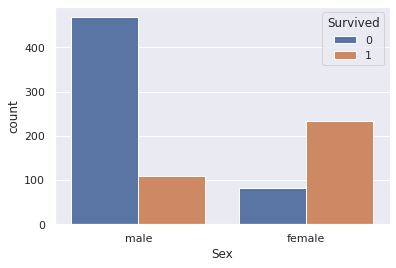

In [7]:
sns.countplot(data=titanic_train_df, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

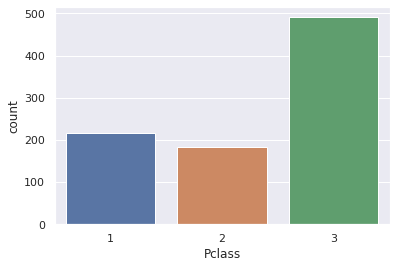

In [8]:
sns.countplot(data=titanic_train_df, x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

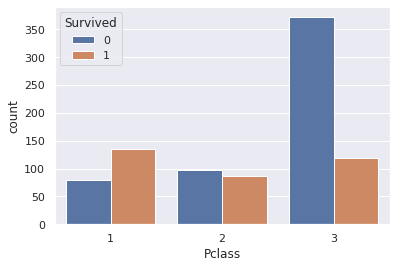

In [9]:
sns.countplot(data=titanic_train_df, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

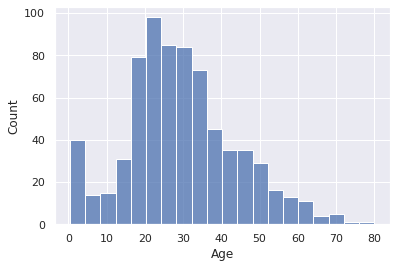

In [10]:
sns.histplot(data=titanic_train_df, x='Age')

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

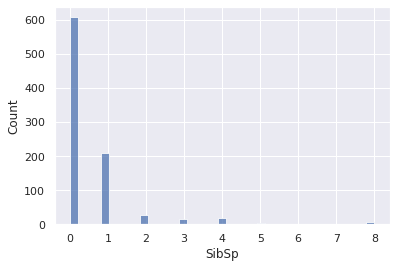

In [11]:
sns.histplot(data=titanic_train_df, x='SibSp')

<AxesSubplot:xlabel='Parch', ylabel='Count'>

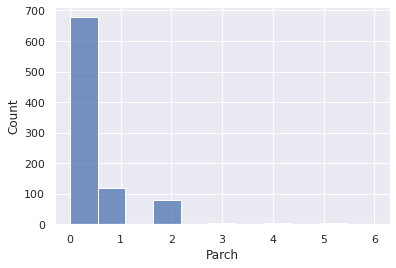

In [12]:
sns.histplot(data=titanic_train_df, x='Parch')
#Age here is a continuous variable while Parch and SibSp are discrete

# Building a RandomForestClassifier model

* Excluding Age in the features set

In [13]:
# Sex and Pclass are categorical while SibSp and Parch are discrete numerical attributes
features = ['Sex', 'Pclass', 'SibSp', 'Parch']

X_train = pd.get_dummies(titanic_train_df[features])
y_train = titanic_train_df['Survived']

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [15]:
forest_clf = RandomForestClassifier(random_state=42)

y_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [16]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.76430976, 0.8013468 , 0.78787879])

In [17]:
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[473,  76],
       [116, 226]])

In [18]:
precision_score(y_train, y_pred)

0.7483443708609272

In [19]:
recall_score(y_train, y_pred)

0.6608187134502924

<AxesSubplot:>

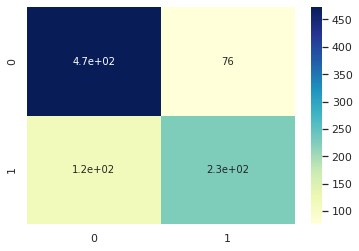

In [20]:
sns.heatmap(data=conf_matrix, cmap='YlGnBu', annot=True)

In [21]:
f1_score(y_train, y_pred)

0.7018633540372671

In [22]:
logit_model = LogisticRegression(random_state=42)

y_pred = cross_val_predict(logit_model, X_train, y_train, cv=3)
cross_val_score(logit_model, X_train, y_train, cv=3, scoring='accuracy')

array([0.7979798 , 0.81818182, 0.78114478])

In [23]:
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[483,  66],
       [113, 229]])

In [24]:
precision_score(y_train, y_pred)

0.7762711864406779

In [25]:
recall_score(y_train, y_pred)

0.6695906432748538

<AxesSubplot:>

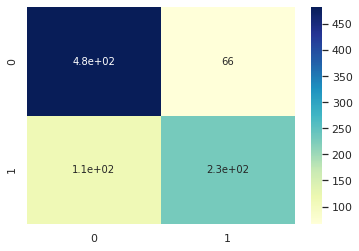

In [26]:
sns.heatmap(data=conf_matrix, cmap='YlGnBu', annot=True)

In [27]:
f1_score(y_train, y_pred)

0.718995290423862

# Final Prediction from the model


In [28]:
titanic_test_df.shape

(418, 11)

In [29]:
X_test = pd.get_dummies(titanic_test_df[features])

In [30]:
logit_model.fit(X_train, y_train)
predictions = logit_model.predict(X_test)
output = pd.DataFrame({'PassengerID':titanic_test_df.PassengerId, 'Survived':predictions})

In [31]:
output[:5]

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
output.to_csv('my_submission.csv', index=False)
print('Submission saved!')

Submission saved!
